# Chart market caps for top crypto assets
Objective is to show whether power laws / network effects exist and to track them

In [163]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

In [7]:
url = "https://coinmarketcap.com"
content = requests.get(url).content
soup = BeautifulSoup(page.content, 'html.parser')

In [48]:
table = soup.find('table', {'id': 'currencies'})

In [92]:
data = {}
for row in table.findChildren('tr'):
    ticker = row.findNext('span', {'class': 'currency-symbol'}).text.strip()
    marketcap = row.findNext('td', {'class': 'market-cap'}).text.strip()
    marketcap = float(marketcap)
    data[ticker] = marketcap
    #print "%s %.0f" % (ticker, marketcap)

In [141]:
top20 = sorted(((value,key) for (key,value) in data.items()),reverse=True)[:20]
t = []
v = []
for i in top20:
    t.append(i[1])
    v.append(i[0]/1e9) # in billions

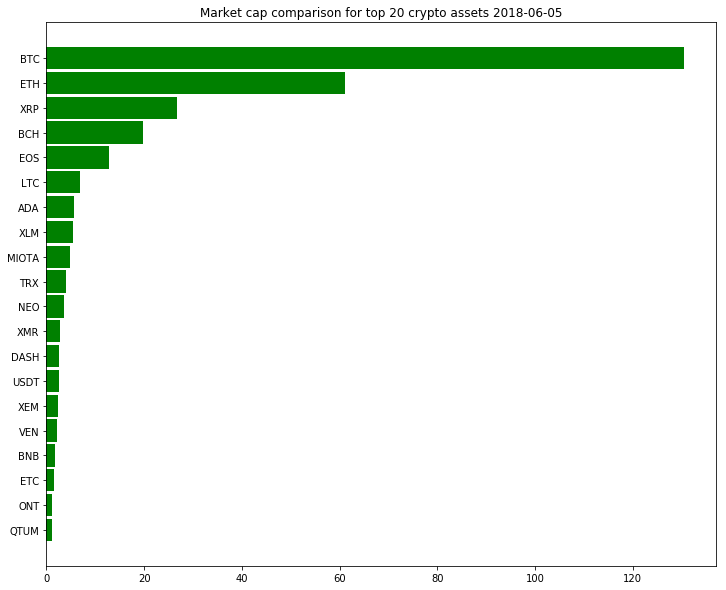

In [167]:
now = datetime.datetime.now()
today = now.strftime("%Y-%m-%d")
fig, ax = plt.subplots(figsize=(12,10))
ax.barh(range(len(t)),v, color='g', height=0.9);
ax.invert_yaxis()
plt.yticks(range(len(t)), t)
plt.title('Market cap comparison for top 20 crypto assets %s' % today);
fig.savefig('market_caps.png', dpi = 200)